Import required libs

In [65]:
import cv2
import torch
import pickle
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from torch.utils.data import DataLoader

Dataset class

In [72]:
class ImageDataset(data.Dataset):
    """
    Dataset class for handwritten lines.

    Parameters
    ----------
    pickle_file : str
        Path to a dataset pickle file.
    meta : bool
        If True, meta data about files is provided.
    num_imgs : int, optional (default=-1)
        Choose only `num_imgs` imgs for processing. If set to -1, uses all available images.

    """

    def __init__(self, pickle_file, meta=False, num_imgs=-1):
        with open(pickle_file, 'rb') as f:
            dataset = pickle.load(f)
        self.reference_dataset = dataset
        self.num_imgs = num_imgs
        if (self.num_imgs > 0) and (self.num_imgs < len(self.reference_dataset)):
            inds = np.random.choice(np.arange(len(self.reference_dataset)),
                                    self.num_imgs, replace=False)
            self.reference_dataset = [self.reference_dataset[i] for i in inds]
        self.meta = meta

    def __getitem__(self, idx):
        data = self.reference_dataset[idx]
        #img = cv2.imread(data['img_path'], cv2.IMREAD_UNCHANGED) / 255.
        img = cv2.resize(cv2.imread(data['img_path']), (442, 75)) / 255.
        img = torch.from_numpy(img).permute(2,0,1)
        text = data['description']
        width = data['width']
        height = data['height']

        if self.meta:
            return img, text, data, width, height
        else:
            return img, text

    def __len__(self):
        return len(self.reference_dataset)

Test dataset loading with specified number of images:

In [67]:
pickle_path = '/home/storage/3020/KrivorotovI/db/HKR/datasets/train.pkl'
train_dataset = ImageDataset(pickle_path, num_imgs=200)
print(len(train_dataset))

200


In [45]:
with open(pickle_path, 'rb') as f:
    dataset = pickle.load(f)

In [47]:
dataset[0]

{'img_path': '/home/storage/3020/KrivorotovI/db/HKR/img/11_40_52.jpg',
 'description': 'Актау',
 'width': 285,
 'height': 71}

In [48]:
width = []
lenght = []
for data in dataset:
    width.append(data['width'])
    lenght.append(data['height'])

In [49]:
np.mean(width)

442.808160846375

In [50]:
np.mean(lenght)

75.38719023683575

In [73]:
train_dataset = ImageDataset(pickle_path, num_imgs=-1)
print(len(train_dataset))

45559


In [74]:
train_dataloader = DataLoader(train_dataset, batch_size=32,
                        shuffle=True, num_workers=1, drop_last = True)

torch.Size([32, 3, 75, 442])
Восточно-Казахстанская


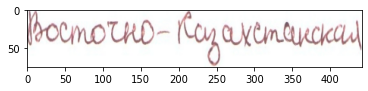

In [89]:
for imgs, text in train_dataloader:
    print(imgs.shape)
    plt.imshow(imgs[0].permute(1,2,0))
    print(text[0])
    break

Works correctly!

In [32]:
img, text = next(iter(train_dataset))
print(text, img.shape)

Актау torch.Size([71, 285, 3])


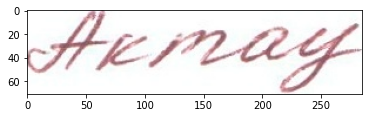

In [33]:
plt.imshow(np.array(img))